# WELCOME TO THE NOTEBOOK
---

Importing Modules

In [1]:
import pandas as pd 

Loading the data

In [2]:
data = pd.read_json('movies_dataset.json')
data.head(2)


,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1


Check the dataframe shape (#rows and #columns)

In [3]:
data.shape

(5043, 14)

Let's check the data types of the columns

In [4]:
data.dtypes

color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
star_name                  object
movie_title                object
movie_imdb_link            object
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

Column Selection

In [5]:
data[['movie_title', 'imdb_score']]

,movie_title,imdb_score
0,Avatar,7.9
1,Pirates of the Caribbean: At World's End,7.1
2,Spectre,6.8
3,The Dark Knight Rises,8.5
4,Star Wars: Episode VII - The Force Awakens,7.1
...,...,...
5038,Signed Sealed Delivered,7.7
5039,The Following,7.5
5040,A Plague So Pleasant,6.3
5041,Shanghai Calling,6.3


---

## Data Preparation
Remove some columns:    
   
   - `movie_imdb_link`
   - `num_critic_for_reviews`
   - `genre`

In [6]:
data.drop(axis=1, columns = ['movie_imdb_link'], inplace=True)

Exercise: Remove the rest of the columns 


In [7]:
data.drop(axis=1, columns = ['num_critic_for_reviews', 'genres'], inplace=True)
data.head(2)

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1


Let's check the shape again

In [8]:
data.shape

(5043, 11)

Let's convert the dtype of `title_year` column to integer

In [9]:
data['title_year'] = data['title_year'].astype('Int64')
data.head(2)

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1


Let's check the dataframe again

Renaming some columns: 
- changing `gross` to `movie_income`

In [10]:
rename_dict = {'gross' : 'movie_income', 'language':'Language'}
data.rename(columns = rename_dict, inplace=True)
data.head(2)

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1


Exercise: Rename the `budget` column to `movie_budget`

In [11]:
data.rename(columns={'budget':'movie_budget'}, inplace=True)
data.head(2)

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1


---
### Data Analysis 


Let's checkout the distribution of `duration` column using a histogram.


In [12]:
data.head(3)

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8


Text(0.5, 1.0, 'Movie Duration Histogram')

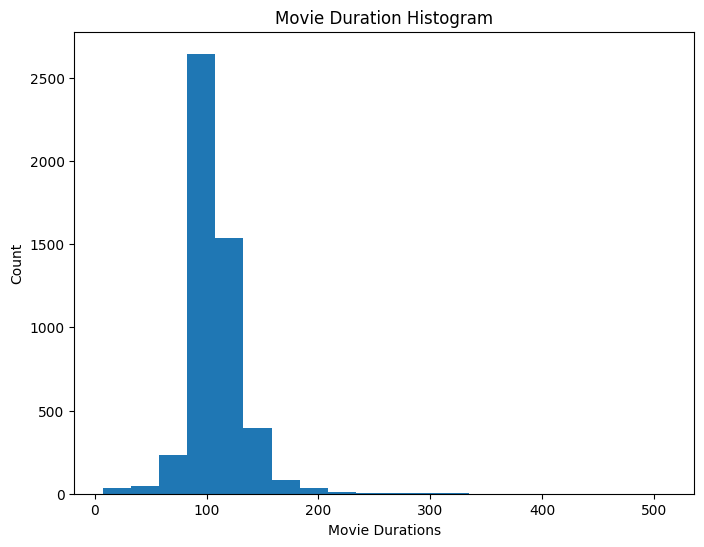

In [13]:
ax = data['duration'].hist(bins=20, figsize=(8,6), grid=False)
ax.set_xlabel('Movie Durations')
ax.set_ylabel('Count')
ax.set_title('Movie Duration Histogram')

Exercise: Create a hitogram to see the distribution of `imdb_score` column

Text(0.5, 1.0, 'IMDB Movie Score Histogram')

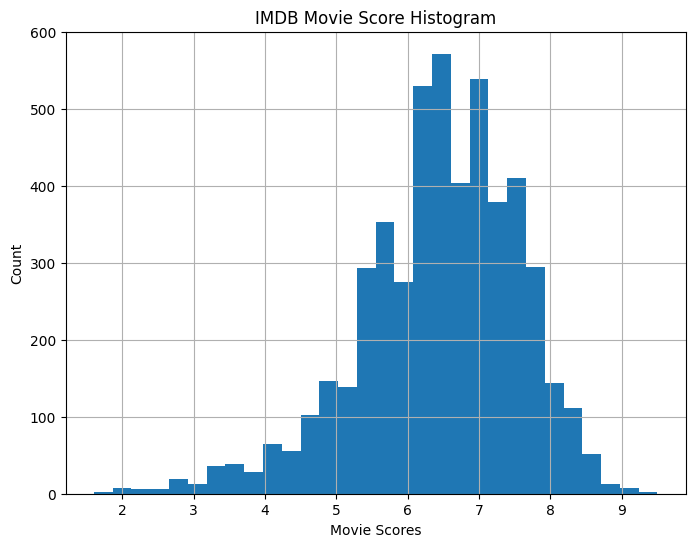

In [14]:
ax = data['imdb_score'].hist(bins=30, figsize=(8,6), grid=True)
ax.set_xlabel('Movie Scores')
ax.set_ylabel('Count')
ax.set_title('IMDB Movie Score Histogram')

Let's check how many movies have the `imdb_score` less than `4`.

In [15]:
low_score_movies = data[ data['imdb_score'] < 4]
low_score_movies

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
217,Color,Joel Schumacher,125.0,107285004.0,Michael Gough,Batman & Robin,English,USA,125000000.0,1997,3.7
267,Color,Jan de Bont,121.0,48068396.0,Jason Patric,Speed 2: Cruise Control,English,USA,160000000.0,1997,3.7
273,Color,Bo Welch,82.0,100446895.0,Sean Hayes,The Cat in the Hat,English,USA,109000000.0,2003,3.8
313,Color,Pitof,87.0,40198710.0,Frances Conroy,Catwoman,English,USA,100000000.0,2004,3.3
319,Color,Lawrence Guterman,94.0,17010646.0,Jamie Kennedy,Son of the Mask,English,USA,84000000.0,2005,2.2
...,...,...,...,...,...,...,...,...,...,...,...
4988,Color,Terron R. Parsons,93.0,NaN,Richard Tyson,Hayride,English,USA,60000.0,2012,3.4
5000,Color,Travis Legge,83.0,NaN,Elissa Dowling,Raymond Did It,English,USA,40000.0,2011,3.2
5002,Color,Collin Joseph Neal,75.0,NaN,Julianne Gabert,"Run, Hide, Die",English,USA,50000.0,2012,3.7
5017,Color,Travis Legge,90.0,NaN,Kristen Seavey,Dry Spell,English,USA,22000.0,2013,3.3


In [16]:
low_score_movies.shape

(156, 11)

Exercise: Use a histogram to visualize the distribution of movie IMdb score in that are produced in `USA`.

Text(0.5, 1.0, 'IMDB Movie Score USA Histogram')

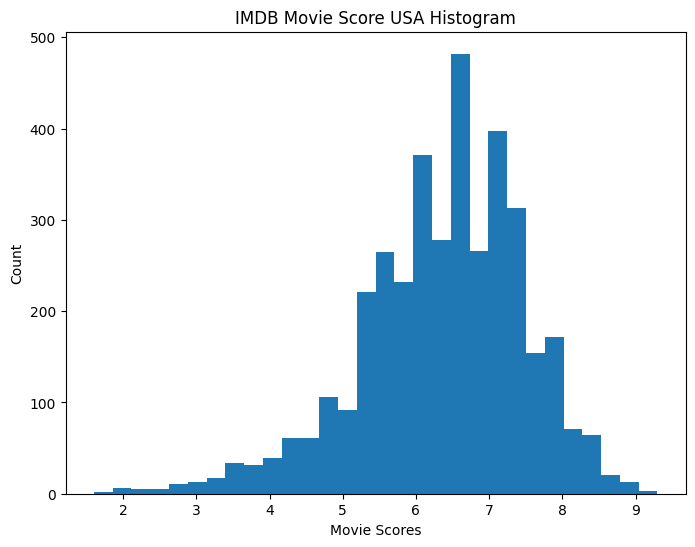

In [17]:
country = 'USA'
movies_in_USA = data[ data['country'] == country ]
ax = movies_in_USA['imdb_score'].hist(bins=30, figsize=(8,6), grid=False)
ax.set_xlabel('Movie Scores')
ax.set_ylabel('Count')
ax.set_title(f'IMDB Movie Score {country} Histogram')

In [18]:
#data[ data['country'] == 'USA' ]['imdb_score'].hist(bins=30, figsize=(8,6), grid=False)

---
### Let's answer to some analytical questions 
    
Question 1 - In which year we have the `highest` and `lowest` number of movies?

Now finding out number of movies per year

In [19]:
count_per_year = data.groupby('title_year').size()
count_per_year.idxmax() #which index has the highest value, while .max() displays the value


2009

In [20]:
count_per_year.idxmin()

1916

Let's create a line chart to show the result

Text(0, 0.5, '# of movies')

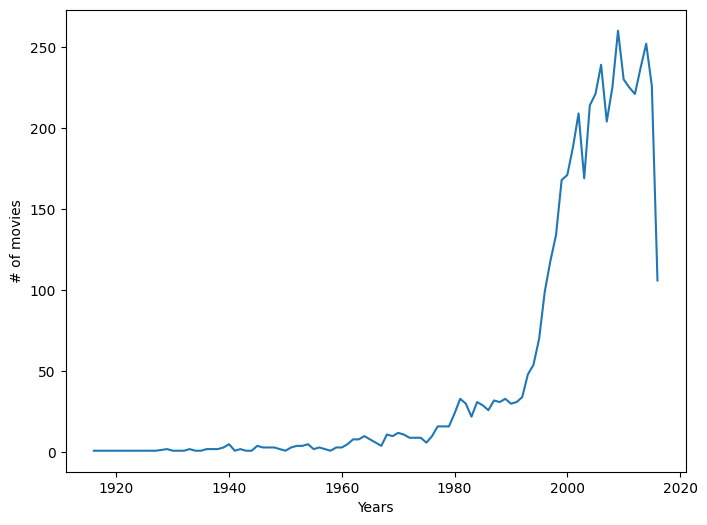

In [21]:
ax = count_per_year.plot(figsize=(8,6))
ax.set_xlabel('Years')
ax.set_ylabel('# of movies')

Question 2 - In which year we have `minimum` and `maximum` average `imdb_score` ? 

Finding average imdb score per year 

In [22]:
avg_scores = data.groupby('title_year')['imdb_score'].mean()

Let's Use a barchart to visualize the result

Text(0, 0.5, 'Average Score')

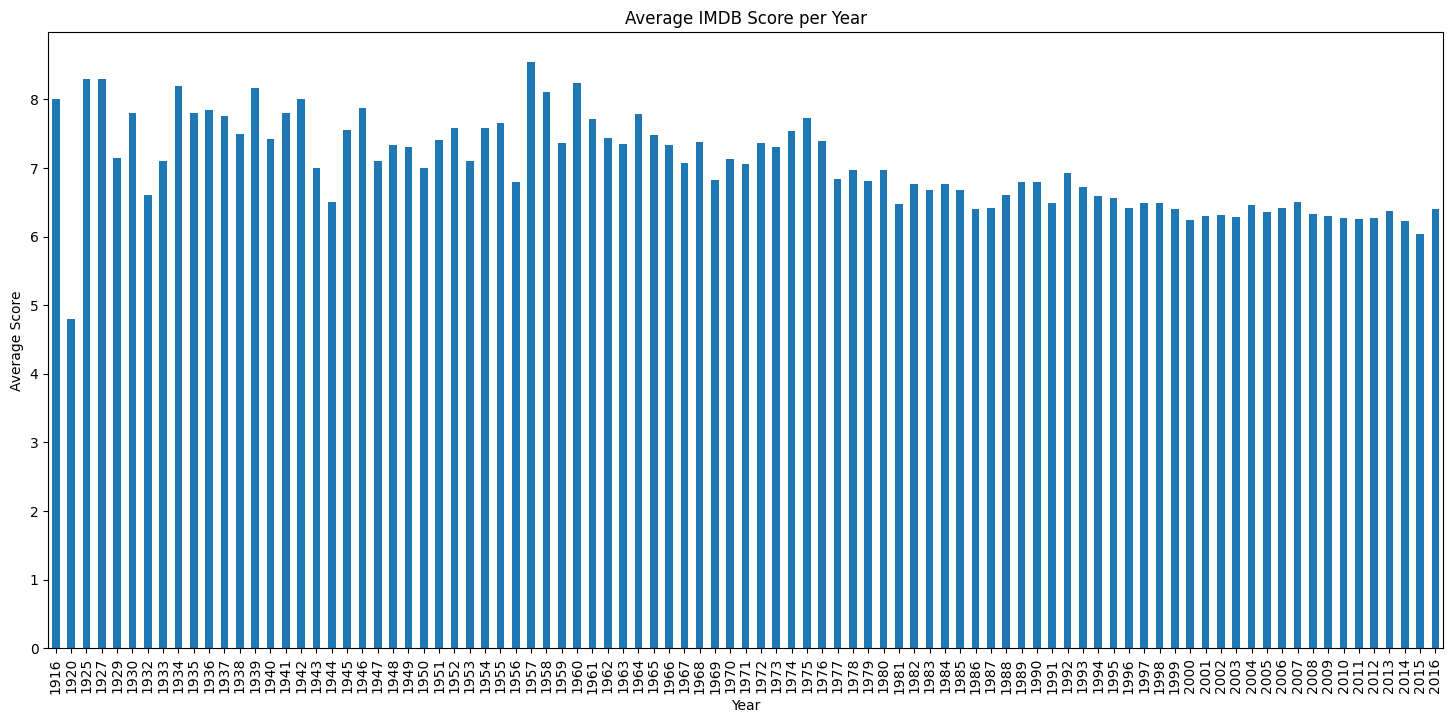

In [23]:
ax = avg_scores.plot.bar(figsize=(18,8), title='Average IMDB Score per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Score')

Exercise: 
Question 3 - In which year we have the `minimum` and `maximum` spent movie budget?

`hint: use a line chart to visualize your results.` 

Lowest budget was 100000.0 in year 1920.
Highest budget was 20019582000.0 in year 2006.


<Axes: title={'center': 'Total annual budgets per year'}, xlabel='Year', ylabel='Budget [$]'>

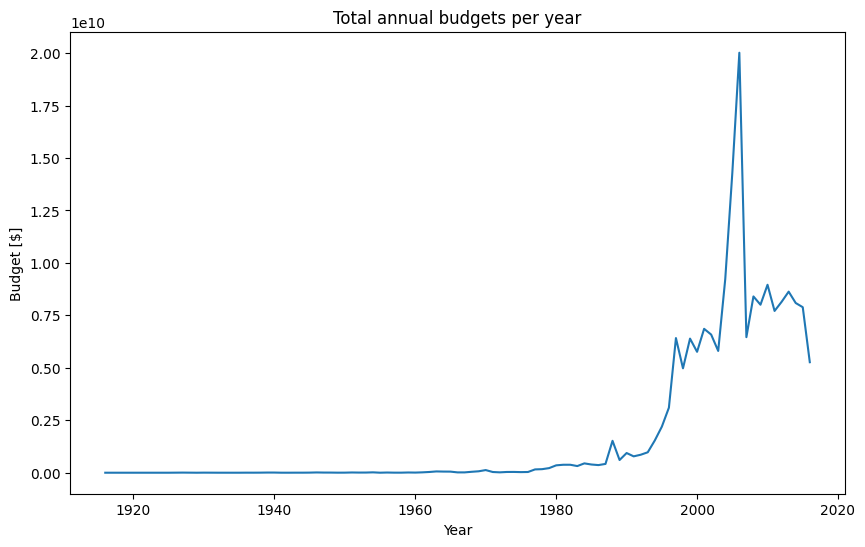

In [24]:
annual_budgets = data.groupby('title_year')['movie_budget'].sum()
print(f"Lowest budget was {annual_budgets.min()} in year {annual_budgets.idxmin()}.")
print(f"Highest budget was {annual_budgets.max()} in year {annual_budgets.idxmax()}.")
annual_budgets.plot(figsize=(10,6), title='Total annual budgets per year', xlabel='Year', ylabel='Budget [$]')

Question 4 - Is there any relationship between IMdb score of a movie and the movie income?

To approaches to solve this question:
- Visual Correlation Analysis 
- Generating the Correlation Matirx

In [27]:
data_q4 = data[ ['imdb_score', 'movie_income'] ]
data_q4

,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
4,7.1,NaN
...,...,...
5038,7.7,NaN
5039,7.5,NaN
5040,6.3,NaN
5041,6.3,10443.0


Let's drop the rows with `non` values

In [28]:
data_q4.dropna(inplace=True)

C:\Users\vanja\AppData\Local\Temp\ipykernel_17532\2985372388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_q4.dropna(inplace=True)


Let's create a scatter plot to see the data

<Axes: xlabel='movie_income', ylabel='imdb_score'>

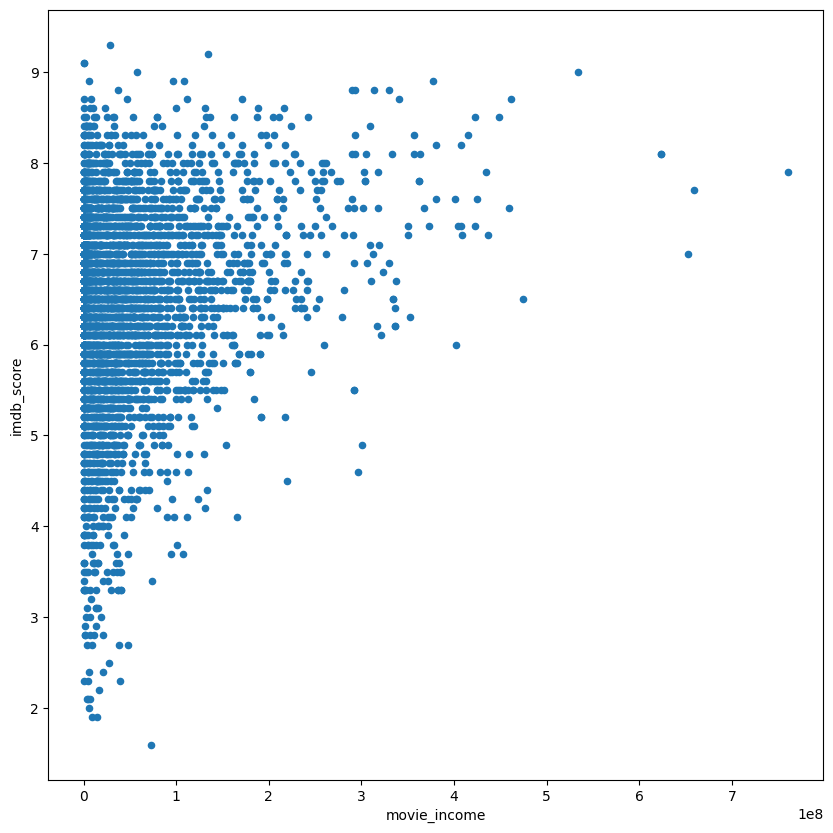

In [31]:
data_q4.plot.scatter(x='movie_income', y='imdb_score', figsize=(10,10))

Let's generate the correlation matrix

In [32]:
data_q4.corr()

,imdb_score,movie_income
imdb_score,1.000000,0.198021
movie_income,0.198021,1.000000
